In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('social_media_ad_optimization.csv')

# Explore data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           500 non-null    object 
 1   age               500 non-null    int64  
 2   gender            500 non-null    object 
 3   location          500 non-null    object 
 4   interests         500 non-null    object 
 5   ad_id             500 non-null    object 
 6   ad_category       500 non-null    object 
 7   ad_platform       500 non-null    object 
 8   ad_type           500 non-null    object 
 9   impressions       500 non-null    int64  
 10  clicks            500 non-null    int64  
 11  conversion        500 non-null    int64  
 12  time_spent_on_ad  500 non-null    float64
 13  day_of_week       500 non-null    object 
 14  device_type       500 non-null    object 
 15  engagement_score  500 non-null    float64
dtypes: float64(2), int64(4), object(10)
memory u

,user_id,age,gender,location,interests,ad_id,ad_category,ad_platform,ad_type,impressions,clicks,conversion,time_spent_on_ad,day_of_week,device_type,engagement_score
0,U0001,58,M,USA,Food,A0001,Sportswear,Facebook,Image,3,0,0,3.38,Friday,Mobile,0.02
1,U0002,55,F,USA,Tech,A0002,Electronics,Facebook,Image,9,9,1,6.77,Saturday,Tablet,0.93
2,U0003,52,F,UK,Gaming,A0003,Luggage,Instagram,Image,13,12,1,13.26,Wednesday,Mobile,0.93
3,U0004,31,F,USA,Tech,A0004,Gadgets,Facebook,Video,14,5,0,24.41,Saturday,Desktop,0.28
4,U0005,52,M,India,Tech,A0005,Luggage,Instagram,Carousel,10,5,0,21.43,Monday,Tablet,0.35


*Data Cleaning and Feature Engineering*


*Create core performance metrics and handle missing or incorrect values.*

In [ ]:
import numpy as np

# Create new columns: CTR and CVR
df['CTR'] = df['clicks'] / df['impressions']
df['CVR'] = df['conversion'] / df['clicks']

# Handle division by zero or missing values
df['CVR'] = df['CVR'].replace([np.inf, -np.inf], 0).fillna(0)


*Descriptive Analytics*

In [ ]:
# Average CTR by platform
platform_ctr = df.groupby('ad_platform')['CTR'].mean().sort_values(ascending=False)

# Average CVR by ad category
category_cvr = df.groupby('ad_category')['CVR'].mean().sort_values(ascending=False)

# Summary statistics by gender or age group (optional)
gender_summary = df.groupby('gender')[['CTR', 'CVR']].mean()


*Visualization – Platform & Category Performance*

*Visualize which ad platforms and content types perform best.*

/tmp/ipython-input-1490735436.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=platform_ctr.reset_index(), x='ad_platform', y='CTR', palette='pastel')
/tmp/ipython-input-1490735436.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


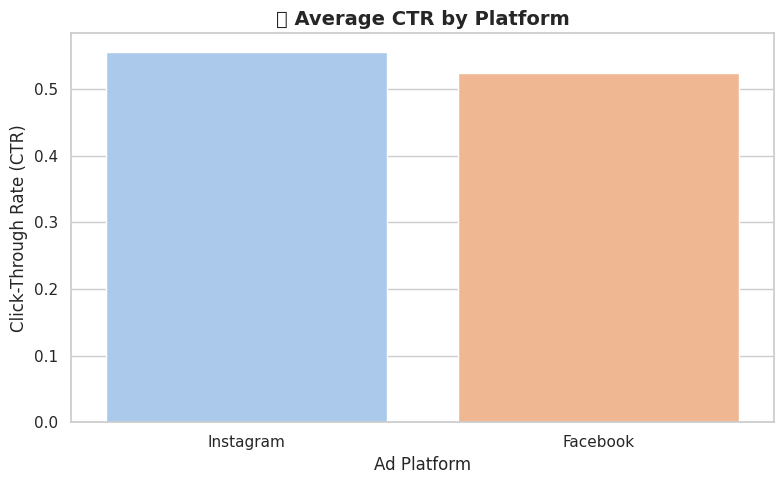

In [ ]:
# CTR by Platform (with horizontal x-axis labels)
plt.figure(figsize=(8, 5))
sns.barplot(data=platform_ctr.reset_index(), x='ad_platform', y='CTR', palette='pastel')
plt.title('📊 Average CTR by Platform', fontsize=14, fontweight='bold')
plt.xlabel('Ad Platform', fontsize=12)
plt.ylabel('Click-Through Rate (CTR)', fontsize=12)
plt.xticks(rotation=0)  # <- this keeps x-axis labels straight
plt.tight_layout()
plt.show()



*This chart shows that Instagram has a higher average click-through rate (CTR) than Facebook, indicating stronger user engagement. Businesses can prioritize ad spend on Instagram for better interaction. Further segmentation (e.g., by age or category) can refine platform strategy and maximize ROI.*

/tmp/ipython-input-560267227.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_cvr.reset_index(), x='ad_category', y='CVR', palette='Set2')
/tmp/ipython-input-560267227.py:8: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


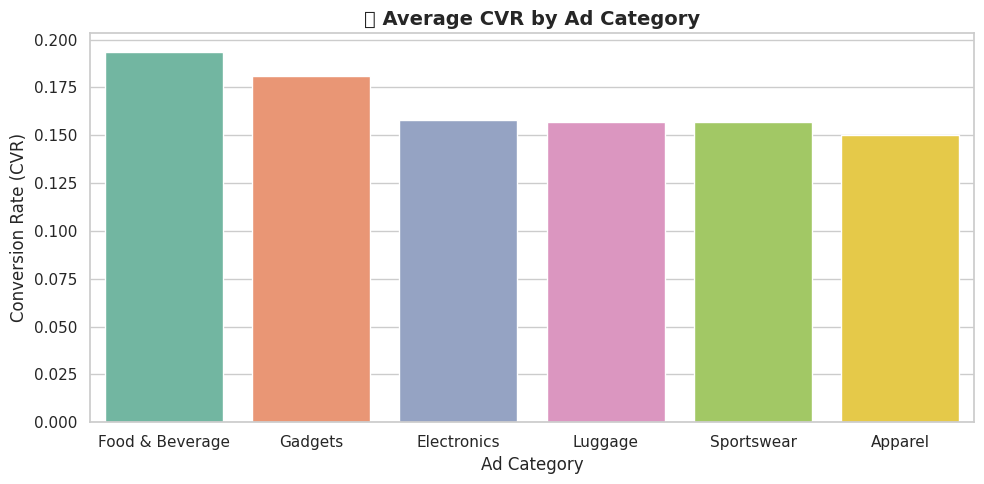

In [ ]:
# CVR by Ad Category (with horizontal x-axis labels)
plt.figure(figsize=(10, 5))
sns.barplot(data=category_cvr.reset_index(), x='ad_category', y='CVR', palette='Set2')
plt.title('🚀 Average CVR by Ad Category', fontsize=14, fontweight='bold')
plt.xlabel('Ad Category', fontsize=12)
plt.ylabel('Conversion Rate (CVR)', fontsize=12)
plt.xticks(rotation=0)  # <- this keeps x-axis labels straight
plt.tight_layout()
plt.show()


*This bar chart shows that Food & Beverage and Gadgets have the highest conversion rates, suggesting they resonate most with users. Lower-performing categories like Apparel may need content or targeting adjustments. Businesses can prioritize high-CVR categories for future campaigns to boost ROI.*

*Heatmap – Conversion Volume by Day and Device*

*This analysis helps uncover when and on which devices users convert the most — valuable insight for scheduling and optimizing ad delivery across devices.*



/tmp/ipython-input-4150885979.py:18: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


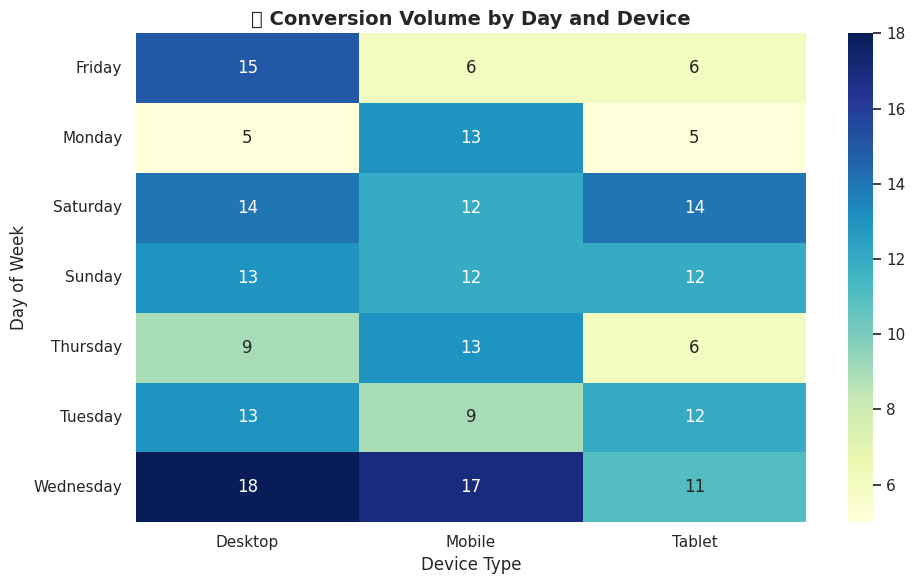

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table: days as rows, devices as columns
conversion_pivot = df.pivot_table(
    index='day_of_week',
    columns='device_type',
    values='conversion',
    aggfunc='sum'
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conversion_pivot, annot=True, fmt='g', cmap='YlGnBu')
plt.title('🔥 Conversion Volume by Day and Device', fontsize=14, fontweight='bold')
plt.xlabel('Device Type')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


*This heatmap shows that Wednesdays drive the highest conversions, especially on desktop and mobile, while weekends perform consistently well across all devices. Mobile devices lead overall, suggesting a mobile-first strategy. Businesses can optimize ad spend by focusing on midweek and weekend delivery.*

***Engagement Trend by Day***

*Analyze how average engagement (or time spent on ads) varies across the week. Helps with scheduling campaigns when users are most active.*

/tmp/ipython-input-2032374283.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_engagement = df.groupby('day_of_week')['engagement_score'].mean().reset_index()
/tmp/ipython-input-2032374283.py:17: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


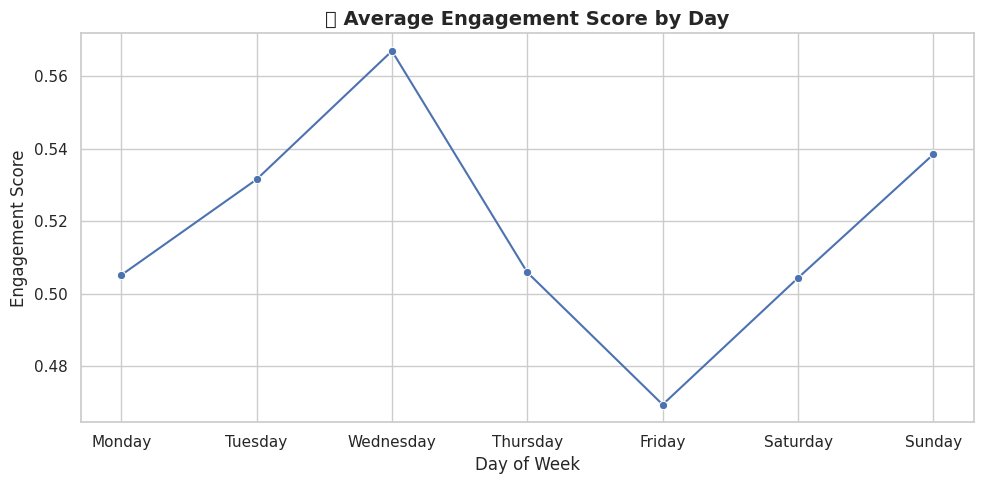

In [ ]:
# Map day names to order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

# Group and calculate average engagement
daily_engagement = df.groupby('day_of_week')['engagement_score'].mean().reset_index()

# Plot the trend
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_engagement, x='day_of_week', y='engagement_score', marker='o')
plt.title('📈 Average Engagement Score by Day', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Engagement Score')
plt.tight_layout()
plt.show()


*This line chart shows that engagement peaks on Wednesday, while Friday sees the lowest interaction levels. User attention rebounds over the weekend, suggesting ideal timing for launching high-engagement campaigns midweek and maintaining visibility through Sunday.*

***Revenue Simulation***

*Estimating how much revenue each ad category or platform generates by assigning a fixed cost-per-click (CPC). This simulates sell-side monetization — directly relevant to the Publisher Intelligence Analyst role.*

/tmp/ipython-input-3791289542.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_category, x='ad_category', y='estimated_revenue', palette='coolwarm')
/tmp/ipython-input-3791289542.py:18: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


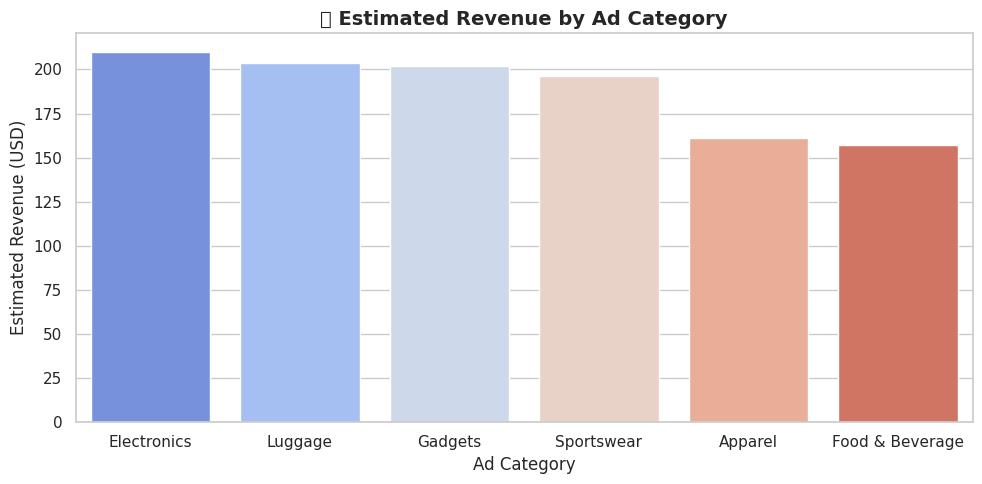

In [ ]:
# Assign a fixed CPC value (e.g., $0.50 per click)
CPC = 0.50
df['estimated_revenue'] = df['clicks'] * CPC

# Group by ad category to find total estimated revenue
revenue_by_category = df.groupby('ad_category')['estimated_revenue'].sum().sort_values(ascending=False).reset_index()

# Plot the results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=revenue_by_category, x='ad_category', y='estimated_revenue', palette='coolwarm')
plt.title('💰 Estimated Revenue by Ad Category', fontsize=14, fontweight='bold')
plt.xlabel('Ad Category')
plt.ylabel('Estimated Revenue (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


*This chart shows that Electronics, Luggage, and Gadgets generate the highest estimated ad revenue, despite Food & Beverage having the best conversion rate earlier. This suggests prioritizing budget allocation not just by CVR but also by click volume to maximize monetization.*

***User Segmentation with Clustering***


/tmp/ipython-input-1922115274.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='user_segment', y='CTR', data=df, palette='Set2')
/tmp/ipython-input-1922115274.py:23: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


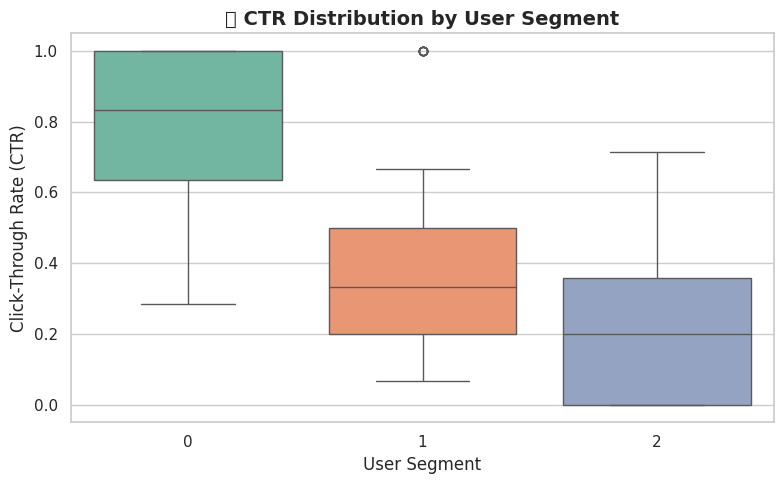

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Select behavioral features for clustering
features = df[['CTR', 'CVR', 'engagement_score', 'time_spent_on_ad']]

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['user_segment'] = kmeans.fit_predict(scaled_features)

# Visualize segment-wise CTR distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x='user_segment', y='CTR', data=df, palette='Set2')
plt.title('📦 CTR Distribution by User Segment', fontsize=14, fontweight='bold')
plt.xlabel('User Segment')
plt.ylabel('Click-Through Rate (CTR)')
plt.tight_layout()
plt.show()


*This boxplot shows that Segment 0 users have the highest click-through rates (CTR) and strongest engagement, while Segment 2 has the lowest CTR, indicating less responsiveness to ads. These segments can be used to tailor content strategies — e.g., retarget Segment 2 or expand high-value campaigns for Segment 0.*








***Key Insights:***
1.   *Instagram outperforms Facebook in CTR, suggesting it’s better for user engagement.*
1.   *Wednesdays drive the highest engagement and conversions, making them ideal for ad delivery.*
2.   *Food & Beverage has the highest CVR, but Electronics generates the most revenue—click volume matters too.*
2.   User Segment 0 is highly engaged, while Segment 2 shows minimal interaction—ideal for personalized targeting or re-engagement efforts.



***Business Recommendations:***
1.   *Shift ad spend toward Instagram and Wednesdays to maximize impact.*
1.   *Double down on high-revenue categories like Electronics with high-performing creatives.*
2.   *Tailor campaigns by user segment, using engagement and CTR as triggers.*

*Downloading the optimized dataset*

In [ ]:
df.to_csv('social_media_ad_optimized.csv', index=False)

In [ ]:
from google.colab import files
files.download('social_media_ad_optimized.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>